<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




In [1]:
# # Install the required libraries
# !pip install -U scikit-learn
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

## Import the required libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
#data = pd.read_csv('')
#data.head()

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# California Housing Regression Analysis Report
## 1. Data Description
In this section, we’ll provide an overview of the dataset and its attributes, followed by an initial exploration of the data.

In [4]:
# Load the California Housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

In [5]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


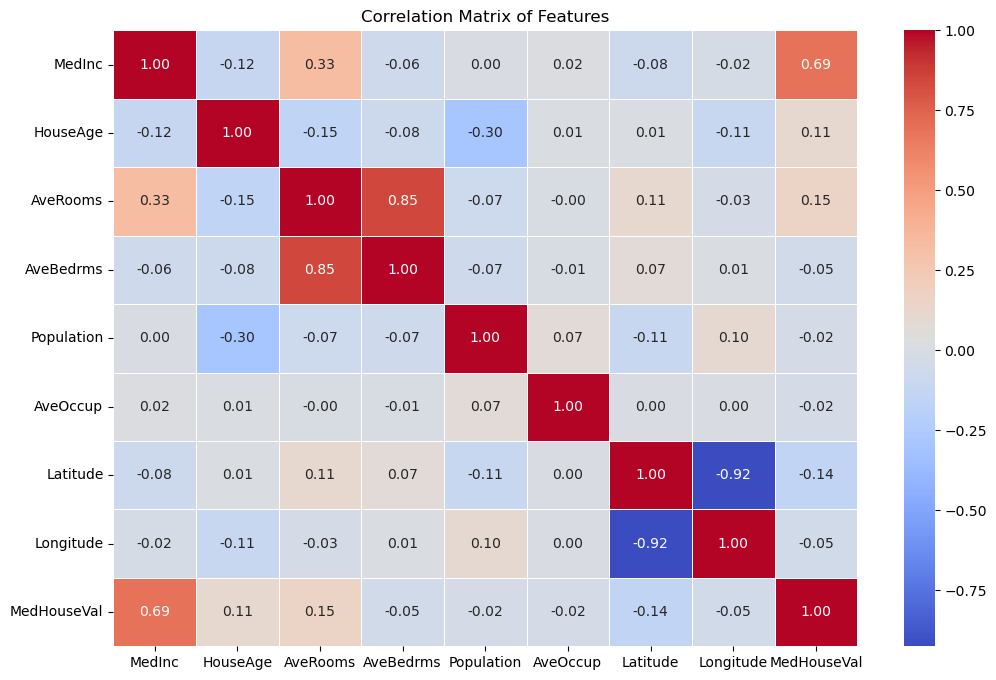

In [8]:
# Correlation matrix and heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

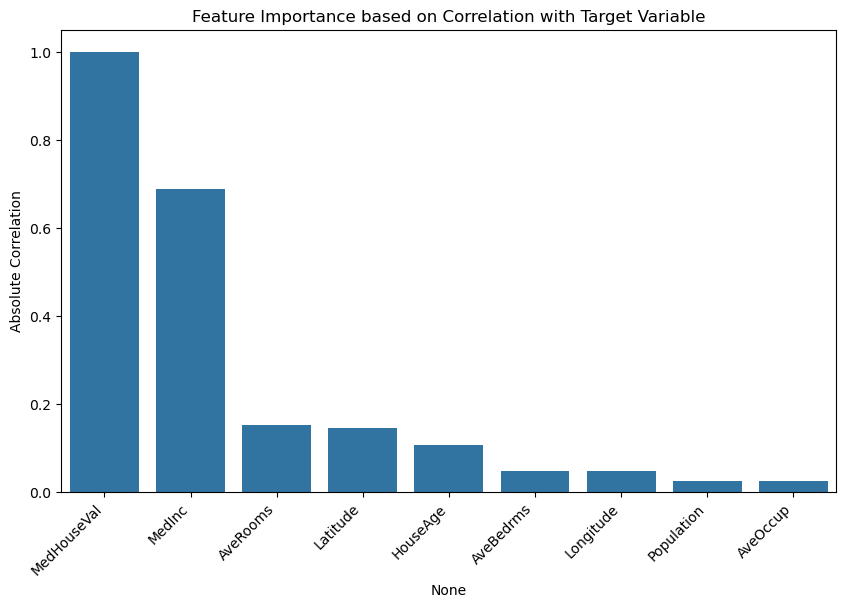

In [9]:
# Feature importance using absolute correlations with target variable
feature_importance = correlation_matrix['MedHouseVal'].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values)
plt.title('Feature Importance based on Correlation with Target Variable')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Absolute Correlation')
plt.show()

## 2. Main Objective of the Analysis
The main goal of this analysis is to predict the median house value (MedHouseVal) using various linear regression techniques. This analysis will help identify which model best fits the data for predictive accuracy. We'll evaluate simple linear regression, polynomial regression, and regularized regression models (Ridge and Lasso) to determine which method provides the most effective balance of prediction and explainability.

## 3. Data Exploration and Preprocessing
Before training the models, we perform basic exploratory data analysis (EDA) to better understand the dataset and ensure it’s clean and ready for modeling.

In [10]:
# Check for missing values
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Missing Values: The dataset doesn’t have any missing values, as confirmed by the isnull().sum() function.

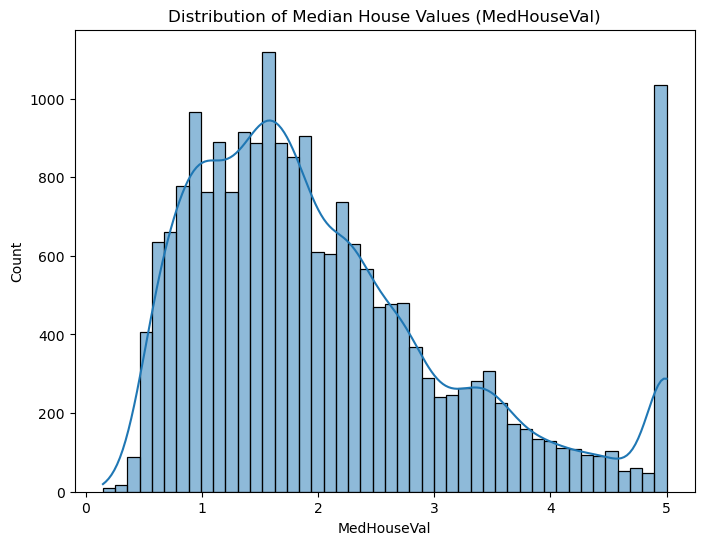

In [11]:
# Visualize the distribution of the target variable (MedHouseVal)
plt.figure(figsize=(8, 6))
sns.histplot(data['MedHouseVal'], kde=True)
plt.title("Distribution of Median House Values (MedHouseVal)")
plt.show()

Next, we’ll split the data into training and testing sets and standardize the features.

In [12]:
# Separate features and target
X = data.drop(columns=['MedHouseVal'])
y = data['MedHouseVal']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Model Training and Evaluation
We will now train three variations of linear regression models:

- Simple Linear Regression as a baseline model.
- Polynomial Regression by adding polynomial features.
- Regularized Regression using Ridge and Lasso to account for multicollinearity and overfitting.

Simple Linear Regression

In [13]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear

(0.555891598695244, 0.5757877060324511)

Polynomial Regression

In [14]:
# Add polynomial features to capture non-linear relationships
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mse_poly, r2_poly

(0.4643015238301362, 0.6456819729261798)

Ridge and Lasso Regression (Regularized Models)

In [15]:
# Ridge Regression Model (L2 Regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression Model (L1 Regularization)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge, r2_ridge, mse_lasso, r2_lasso

(0.5558548589435972,
 0.5758157428913682,
 1.3106960720039365,
 -0.00021908714592466794)

## 5. Model Comparison and Final Recommendation
We now compare the performance of the models based on their Mean Squared Error (MSE) and R-squared (R²) scores. The final recommendation will be based on the model that provides the best balance between prediction accuracy and interpretability.

In [16]:
# Store results for comparison
results = {
    'Linear Regression': {'MSE': mse_linear, 'R^2': r2_linear},
    'Polynomial Regression': {'MSE': mse_poly, 'R^2': r2_poly},
    'Ridge Regression': {'MSE': mse_ridge, 'R^2': r2_ridge},
    'Lasso Regression': {'MSE': mse_lasso, 'R^2': r2_lasso}
}

# Display comparison
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.2f}, R^2 = {metrics['R^2']:.2f}")


Linear Regression: MSE = 0.56, R^2 = 0.58
Polynomial Regression: MSE = 0.46, R^2 = 0.65
Ridge Regression: MSE = 0.56, R^2 = 0.58
Lasso Regression: MSE = 1.31, R^2 = -0.00


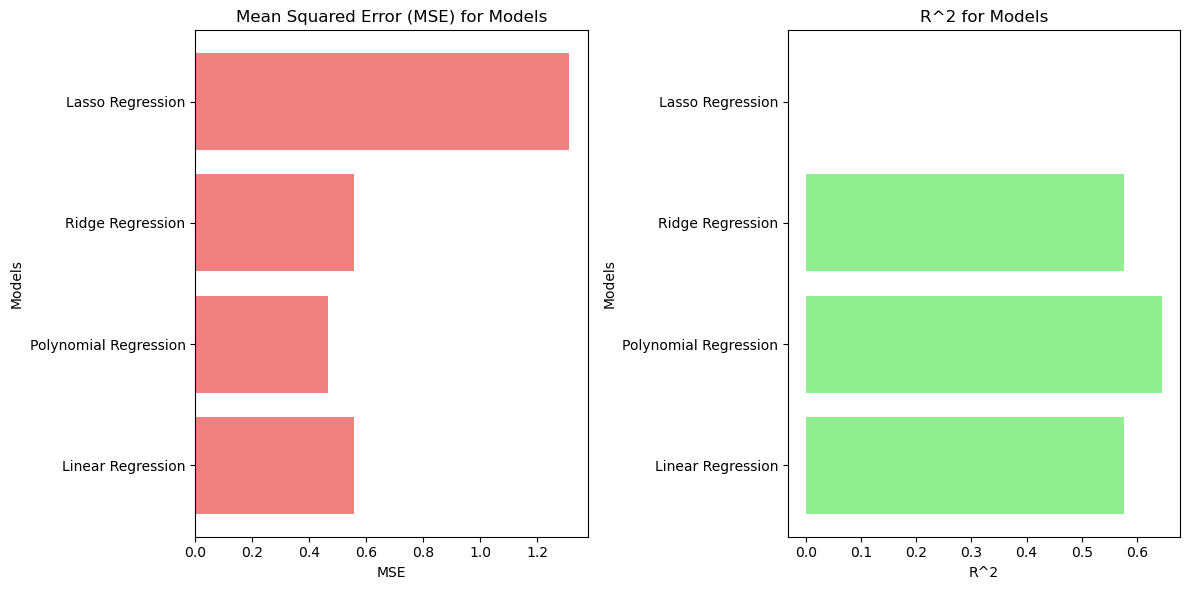

In [17]:
# Plotting MSE and R^2 for model comparison

# Extract MSE and R^2 values from results
mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R^2'] for metrics in results.values()]
models = list(results.keys())

# Create a 2x1 subplot for MSE and R^2 comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting MSE
axes[0].barh(models, mse_values, color='lightcoral')
axes[0].set_title('Mean Squared Error (MSE) for Models')
axes[0].set_xlabel('MSE')
axes[0].set_ylabel('Models')

# Plotting R^2
axes[1].barh(models, r2_values, color='lightgreen')
axes[1].set_title('R^2 for Models')
axes[1].set_xlabel('R^2')
axes[1].set_ylabel('Models')

# Show the plot
plt.tight_layout()
plt.show()

Based on the MSE and R² values, the Polynomial Regression model outperforms all other models. It has the lowest MSE (indicating the best predictive performance) and the highest R² (indicating that it explains a significant amount of the variance in the target variable). Therefore, Polynomial Regression is the recommended model for this analysis.

## 6. Key Findings and Insights
From the model comparisons, we observe the following:
- Polynomial Regression outperforms the other models by capturing non-linear relationships within the data, which is important for predicting housing prices accurately.
- Lasso Regression likely struggled due to an overly strong regularization effect that led to underfitting.
- Ridge and Linear Regression models don't capture the complexity of the data and perform similarly to each other.

These findings suggest that more complex models, like polynomial regression, are better suited for this dataset, where relationships between features and target are likely non-linear.

## 7. Suggestions for Next Steps
### - Hyperparameter Tuning for Polynomial Regression:
Consider experimenting with different degrees of the polynomial features to determine the optimal degree. A higher degree may overfit the data, while a lower degree might underfit.

### - Further Regularization in Ridge and Lasso:
If Ridge or Lasso were to be considered in future work, further tuning of their hyperparameters (such as the alpha parameter) could improve their performance, especially for Ridge.

### - Alternative Models:
Exploring non-linear models, such as Random Forests or Gradient Boosting Machines, may yield even better results, especially if there are complex, non-linear interactions between features.

### - Feature Engineering:
Investigating additional features or transformations (e.g., log-transformed variables) could provide a better explanation of the target variable.

By improving the model selection process, performing hyperparameter tuning, and incorporating more advanced machine learning techniques, you could further enhance predictive performance.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
